只用opencv，在A4纸上生成所需的扇环

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# A4
width, height = int(21000), int(29700)
image = np.ones((height, width, 3), dtype=np.uint8)*255

# 定义扇形的参数
center = (5000, 0)  # 扇形的中心坐标
in_radius = 3082 #内圆半径
radius = 4206  # 扇形的半径
start_angle = 0  # 扇形的起始角度（度数）
end_angle = 163.49  # 扇形的终止角度（度数）
color = (0, 255, 0)  # 扇形的颜色，这里是绿色
inner_color = (255,255,255)
thickness = -1  # 填充扇形，使用负数线宽值

# 使用OpenCV的绘图函数绘制扇形
cv2.ellipse(image, center, (radius, radius), 0, start_angle, end_angle, color, thickness)
cv2.ellipse(image, center, (in_radius, in_radius), 0, start_angle, end_angle, inner_color, thickness)


# 保存绘制好的图像
cv2.imwrite('fanRing.png', image)
# plt.imshow(image)

# 显示图像
# cv2.imshow('fanRing', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


生成一圈朝向圆心的二维码

In [ ]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import os


# 定义图片文件夹路径
image_folder = '/home/daic/Desktop/cv_work/output_markers'

# 获取图片文件夹中的所有文件
image_files = [os.path.join(image_folder, filename) for filename in os.listdir(image_folder) if filename.endswith('.png')]

# 创建一个空列表来存储读取的图片
images = []

# 使用循环读取每张图片并存储在列表中
for image_file in image_files:
    print(image_file)
    image = cv2.imread(image_file)
    if image is not None:
        images.append(image)
    else:
        print(f"Failed to read image: {image_file}")


# 图片尺寸和数量
image_width, image_height = 1000, 1000
num_images = len(images)

# 圆环的半径和中心坐标
radius = 2000
center_x, center_y = 3000, 3000


# 创建一个空白画布
canvas = 255 * np.ones((6000, 6000, 3), dtype=np.uint8)

# 计算每张图片的角度间隔
angle_step = 360 / num_images


for i in range(num_images):
    print(f'i={i}')
    angle_deg = i * angle_step
    angle_rad = math.radians(angle_deg) #angle_rad = angle_deg * π / 180
    x = int(center_x + radius * math.cos(angle_rad)) - image_width // 2
    y = int(center_y + radius * math.sin(angle_rad)) - image_height // 2


    # 计算旋转角度，使图片面向圆心
    rotation_angle_deg = -angle_deg  # 负号用于逆时针旋转
    rotation_matrix = cv2.getRotationMatrix2D((image_width // 2, image_height // 2), rotation_angle_deg, 1)
    rotated_image = cv2.warpAffine(images[i], rotation_matrix, (image_width, image_height))

    # 将旋转后图片放在计算出的位置上
    canvas[y:y + image_height, x:x + image_width] = rotated_image

    plt.imshow(canvas)
# # 显示圆环
# cv2.imshow('Circular Layout with Rotation', canvas)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

旋转图片不截断

In [ ]:
import cv2
import numpy as np

# 读取图片
image = cv2.imread('westbrook.jpg')

# 获取图片的中心点坐标
height, width = image.shape[:2]
center = (width // 2, height // 2)

# 定义旋转矩阵
angle = 45  # 旋转角度
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

# 计算旋转后的图像尺寸
cosine = np.abs(rotation_matrix[0, 0])
sine = np.abs(rotation_matrix[0, 1])
new_width = int((height * sine) + (width * cosine))
new_height = int((height * cosine) + (width * sine))

# 调整旋转矩阵以确保图像不被裁剪
rotation_matrix[0, 2] += (new_width / 2) - center[0]
rotation_matrix[1, 2] += (new_height / 2) - center[1]

# 进行旋转
rotated_image = cv2.warpAffine(image, rotation_matrix, (new_width, new_height), flags=cv2.INTER_LINEAR)

# 显示旋转后的图像
cv2.imshow('Rotated Image', rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


完整生成带二维码的扇环61-68

In [ ]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import os


# A4
width, height = int(21000), int(29700)
canvas = np.ones((height, width, 3), dtype=np.uint8)*255

# 定义扇环的参数
center = (5000, 1000)  # 扇形的中心坐标

# 定义图片文件夹路径
image_folder = 'E:\OneDrive\FineTool\cv-work\cv_work\output_6168'

# 获取图片文件夹中的所有文件
image_files = [os.path.join(image_folder, filename) for filename in os.listdir(image_folder) if filename.endswith('.png')]

# 创建一个空列表来存储读取的图片
images = []

# 使用循环读取每张图片并存储在列表中
for image_file in image_files:
    print(image_file)
    image = cv2.imread(image_file)
    if image is not None:
        images.append(image)
    else:
        print(f"Failed to read image: {image_file}")


# aruco图片尺寸和数量
image_width, image_height = 800, 800
center_aruco = (image_width//2,image_height//2)
num_images = len(images)

# 二维码环的半径
radius = 3644 #in_radius + radius /2

# 计算每张图片的角度间隔
angle_step = 150 / num_images

points = []
for i in range(num_images):
    print(f'i={i}')
    angle_deg = (i+1)* angle_step
    angle_rad = math.radians(angle_deg) #angle_rad = angle_deg * π / 180
    # x = int(center_x + radius * math.cos(angle_rad)) - image_width // 2
    # y = int(center_y + radius * math.sin(angle_rad)) - image_height // 2
    x = int(center[0] + radius * math.cos(angle_rad)) 
    y = int(center[1] + radius * math.sin(angle_rad)) 
    points.append((x,y))


    images[i] = cv2.resize(images[i],(image_width,image_height))

    # 计算旋转角度，使图片面向圆心
    rotation_angle_deg = -angle_deg  # 负号用于逆时针旋转
    rotation_matrix = cv2.getRotationMatrix2D((image_width // 2, image_height // 2), rotation_angle_deg, 1)
    #计算旋转后的尺寸
    cosine = np.abs(rotation_matrix[0,0])
    sine = np.abs(rotation_matrix[0,1])
    new_width = int((image_height*sine)+(image_width*cosine))
    new_height = int((image_height*cosine)+(image_width*sine))

    #调整旋转矩阵确保图像不被裁剪
    rotation_matrix[0,2] += (new_width/2) - center_aruco[0]
    rotation_matrix[1,2] += (new_height/2) - center_aruco[1]

    #进行旋转
    rotated_image = cv2.warpAffine(images[i], rotation_matrix, (new_width, new_height),flags=cv2.INTER_LINEAR ,borderValue=(255, 255, 255))

    # 将旋转后图片放在计算出的位置上
    # canvas[y:y + new_height, x:x + new_width] = rotated_image
    canvas[int(y-new_height/2):int(y + new_height/2), int(x-new_width/2):int(x + new_width/2)] = rotated_image

#绘制扇环

in_radius = 3082 #内圆半径
radius = 4206  # 扇形的半径
start_angle = 0  # 扇形的起始角度（度数）
end_angle = 163.49  # 扇形的终止角度（度数）
color = (0, 0, 0)  # 外扇环的颜色，
inner_color = (0,0,0)
thickness = 10  # 填充扇形，使用负数线宽值

# 使用OpenCV的绘图函数绘制扇形
cv2.ellipse(canvas, center, (radius, radius), 0, start_angle, end_angle, color, thickness);
cv2.ellipse(canvas, center, (in_radius, in_radius), 0, start_angle, end_angle, inner_color, thickness);

#画一个10X10的标准框用于测量
top_left = (500,1000)
bottom_right = (10500,6000)
cv2.rectangle(canvas,top_left,bottom_right,color,thickness)

cv2.imwrite('arucoRing.png', canvas)




0.定义两个函数
函数def generateMyArucoMarkers(output_folder,start_ID,marker_nums):
生成指定文件下连续ID号的DICT_4X4_250二维码函数，大小1000X1000  
输入参数

函数def generateArucoSetor(image_folder,center,image_width,image_height,radius):
生成指定文件夹下扇环形状的二维码，均匀排列
输入参数：文件名，中心点，二维码宽度，二维码高度，二维码围成的半径

In [7]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2.aruco as aruco


def generateMyArucoMarkers(output_folder,start_ID,marker_nums):
# 创建目标文件夹
    os.makedirs(output_folder, exist_ok=True)
    markers = []
    image_size = 100
    marker_size = 100
    marker_nums = 8

    markerImage = np.zeros((image_size,image_size), np.uint8)
    #markerImage = cv.cvtColor(blank_markerImage,cv.COLOR_BGR2GRAY)
    dictionary = aruco.getPredefinedDictionary(aruco.DICT_4X4_250)
    for i in range(marker_nums):
        output_markername = os.path.join(output_folder,f'marker_{i+1}.png')
        generator = aruco.generateImageMarker(dictionary,int(i+start_ID),marker_size,markerImage,1)

        success = cv2.imwrite(output_markername,generator)
        if success:
            print(f'Saved {output_markername}')
        else:
            print(f'Failed to save {output_markername}')
        markers.append(generator)




def generateArucoSetor(image_folder,center,image_width,image_height,radius,angle):
   # 获取图片文件夹中的所有文件
    image_files = [os.path.join(image_folder, filename) for filename in os.listdir(image_folder) if filename.endswith('.png')]

    # 创建一个空列表来存储读取的图片
    images = []

    # 使用循环读取每张图片并存储在列表中
    for image_file in image_files:
        print(image_file)
        image = cv2.imread(image_file)
        if image is not None:
            images.append(image)
        else:
            print(f"Failed to read image: {image_file}")

    center_aruco = (image_width//2,image_height//2)
    num_images = len(images)

    # 计算每张图片的角度间隔
    angle_step = angle / num_images

    points = []
    for i in range(num_images):
        # print(f'i={i}')
        angle_deg = (i)* angle_step + 10
        angle_rad = math.radians(angle_deg) #angle_rad = angle_deg * π / 180
        # x = int(center_x + radius * math.cos(angle_rad)) - image_width // 2
        # y = int(center_y + radius * math.sin(angle_rad)) - image_height // 2
        x = int(center[0] + radius * math.cos(angle_rad)) 
        y = int(center[1] + radius * math.sin(angle_rad)) 
        points.append((x,y))


        images[i] = cv2.resize(images[i],(image_width,image_height))

        # 计算旋转角度，使图片面向圆心
        rotation_angle_deg = -angle_deg  # 负号用于逆时针旋转
        rotation_matrix = cv2.getRotationMatrix2D((image_width // 2, image_height // 2), rotation_angle_deg, 1)
        #计算旋转后的尺寸
        cosine = np.abs(rotation_matrix[0,0])
        sine = np.abs(rotation_matrix[0,1])
        new_width = int((image_height*sine)+(image_width*cosine))
        new_height = int((image_height*cosine)+(image_width*sine))

        #调整旋转矩阵确保图像不被裁剪
        rotation_matrix[0,2] += (new_width/2) - center_aruco[0]
        rotation_matrix[1,2] += (new_height/2) - center_aruco[1]

        #进行旋转
        rotated_image = cv2.warpAffine(images[i], rotation_matrix, (new_width, new_height),flags=cv2.INTER_LINEAR ,borderValue=(255, 255, 255))

        # 将旋转后图片放在计算出的位置上
        # canvas[y:y + new_height, x:x + new_width] = rotated_image
        canvas[int(y-new_height/2):int(y + new_height/2), int(x-new_width/2):int(x + new_width/2)] = rotated_image

1.先在指定文件夹生成指定连续ID的二维码,如果已经生成到指定文件夹跳到下一步

In [8]:
output_folder = 'output_169176'
start_ID = 169
marker_nums = 8

generateMyArucoMarkers(output_folder,start_ID,marker_nums)

output_folder = 'output_161168'
start_ID = 161
marker_nums = 8

generateMyArucoMarkers(output_folder,start_ID,marker_nums)

output_folder = 'output_6976'
start_ID = 69
marker_nums = 8

generateMyArucoMarkers(output_folder,start_ID,marker_nums)

output_folder = 'output_6168'
start_ID = 61
marker_nums = 8

generateMyArucoMarkers(output_folder,start_ID,marker_nums)


Saved output_169176\marker_1.png
Saved output_169176\marker_2.png
Saved output_169176\marker_3.png
Saved output_169176\marker_4.png
Saved output_169176\marker_5.png
Saved output_169176\marker_6.png
Saved output_169176\marker_7.png
Saved output_169176\marker_8.png
Saved output_161168\marker_1.png
Saved output_161168\marker_2.png
Saved output_161168\marker_3.png
Saved output_161168\marker_4.png
Saved output_161168\marker_5.png
Saved output_161168\marker_6.png
Saved output_161168\marker_7.png
Saved output_161168\marker_8.png
Saved output_6976\marker_1.png
Saved output_6976\marker_2.png
Saved output_6976\marker_3.png
Saved output_6976\marker_4.png
Saved output_6976\marker_5.png
Saved output_6976\marker_6.png
Saved output_6976\marker_7.png
Saved output_6976\marker_8.png
Saved output_6168\marker_1.png
Saved output_6168\marker_2.png
Saved output_6168\marker_3.png
Saved output_6168\marker_4.png
Saved output_6168\marker_5.png
Saved output_6168\marker_6.png
Saved output_6168\marker_7.png
Saved o

用函数生成扇环二维码（老版）

In [ ]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import os

# A4
width, height = int(21000), int(29700)

canvas = np.zeros((height, width, 3), dtype=np.uint8)
canvas[50:29650,50:20950] = 255

#################输入参数6168########################
# 定义扇环的参数
center = (5000, 1000)  # 扇形的中心坐标
# 定义图片文件夹路径
image_folder = 'E:\OneDrive\FineTool\cv-work\cv_work\output_6168'
# aruco图片尺寸
image_width, image_height = 800, 800
# 二维码环的半径
radius = 3644 #in_radius + radius /2
#扇环张角
angel = 163.49

#################输入参数6976########################
# 定义扇环的参数
center2 = (5000, 7000)  # 扇形的中心坐标
# 定义图片文件夹路径
image_folder2 = 'E:\OneDrive\FineTool\cv-work\cv_work\output_6976'
# aruco图片尺寸
# image_width, image_height = 800, 800
# 二维码环的半径
# radius = 3644 #in_radius + radius /2

generateArucoSetor(image_folder,center,image_width,image_height,radius,angel)
generateArucoSetor(image_folder2,center2,image_width,image_height,radius,angel)

#绘制扇环

in_radius = 3082 #内圆半径
radius = 4206  # 外圆的半径
start_angle = 0  # 扇形的起始角度（度数）
end_angle = 163.49  # 扇形的终止角度（度数）
color = (0, 0, 0)  # 外扇环的颜色，
inner_color = (0,0,0)
thickness = 10  # 填充扇形，使用负数线宽值

# 使用OpenCV的绘图函数绘制扇形
cv2.ellipse(canvas, center, (radius, radius), 0, start_angle, end_angle, color, thickness);
cv2.ellipse(canvas, center, (in_radius, in_radius), 0, start_angle, end_angle, inner_color, thickness);

cv2.ellipse(canvas, center2, (radius, radius), 0, start_angle, end_angle, color, thickness);
cv2.ellipse(canvas, center2, (in_radius, in_radius), 0, start_angle, end_angle, inner_color, thickness);

#画一个10X10的标准框用于测量
top_left = (500,1000)
bottom_right = (10500,6000)
cv2.rectangle(canvas,top_left,bottom_right,color,thickness)

top_left = (500,7000)
bottom_right = (10500,12000)
cv2.rectangle(canvas,top_left,bottom_right,color,thickness)

cv2.imwrite('arucoRing.png', canvas)




2.用函数生成扇环二维码（新版）61-68 69-76 161-168 169-176

E:\OneDrive\FineTool\cv-work\cv_work\output_161168\marker_1.png
E:\OneDrive\FineTool\cv-work\cv_work\output_161168\marker_2.png
E:\OneDrive\FineTool\cv-work\cv_work\output_161168\marker_3.png
E:\OneDrive\FineTool\cv-work\cv_work\output_161168\marker_4.png
E:\OneDrive\FineTool\cv-work\cv_work\output_161168\marker_5.png
E:\OneDrive\FineTool\cv-work\cv_work\output_161168\marker_6.png
E:\OneDrive\FineTool\cv-work\cv_work\output_161168\marker_7.png
E:\OneDrive\FineTool\cv-work\cv_work\output_161168\marker_8.png
E:\OneDrive\FineTool\cv-work\cv_work\output_169176\marker_1.png
E:\OneDrive\FineTool\cv-work\cv_work\output_169176\marker_2.png
E:\OneDrive\FineTool\cv-work\cv_work\output_169176\marker_3.png
E:\OneDrive\FineTool\cv-work\cv_work\output_169176\marker_4.png
E:\OneDrive\FineTool\cv-work\cv_work\output_169176\marker_5.png
E:\OneDrive\FineTool\cv-work\cv_work\output_169176\marker_6.png
E:\OneDrive\FineTool\cv-work\cv_work\output_169176\marker_7.png
E:\OneDrive\FineTool\cv-work\cv_work\out

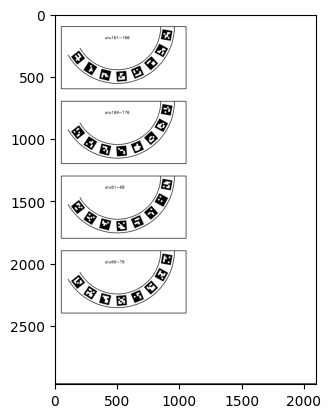

In [14]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import os

# A4
width, height = int(2100), int(2970)
# canvas = np.ones((height, width, 3), dtype=np.uint8)*255
canvas = np.zeros((height, width, 3), dtype=np.uint8)
canvas[5:2965,5:2095] = 255

#################输入参数161168########################
# 定义扇环的参数
center = (500, 100)  # 扇形的中心坐标
# 定义图片文件夹路径
image_folder = 'E:\OneDrive\FineTool\cv-work\cv_work\output_161168'
# aruco图片尺寸
image_width, image_height = 80, 80
# 二维码环的半径
radius = 401.95 #in_radius + radius /2
#扇环张角
angel = 150.449


#################输入参数169176########################
# 定义扇环的参数
center2 = (500, 700)  # 扇形的中心坐标
# 定义图片文件夹路径
image_folder2 = 'E:\OneDrive\FineTool\cv-work\cv_work\output_169176'
# aruco图片尺寸
# image_width, image_height = 800, 800
# 二维码环的半径
# radius = 3644 #in_radius + radius /2

#################输入参数6168########################
# 定义扇环的参数
center3 = (500, 1300)  # 扇形的中心坐标
# 定义图片文件夹路径
image_folder3 = 'E:\OneDrive\FineTool\cv-work\cv_work\output_6168'


#################输入参数6976########################
# 定义扇环的参数
center4 = (500, 1900)  # 扇形的中心坐标
# 定义图片文件夹路径
image_folder4 = 'E:\OneDrive\FineTool\cv-work\cv_work\output_6976'


generateArucoSetor(image_folder,center,image_width,image_height,radius,angel)
generateArucoSetor(image_folder2,center2,image_width,image_height,radius,angel)
generateArucoSetor(image_folder3,center3,image_width,image_height,radius,angel)
generateArucoSetor(image_folder4,center4,image_width,image_height,radius,angel)



#绘制扇环

in_radius = 347 #内圆半径
radius = 457  # 外圆的半径
start_angle = 0  # 扇形的起始角度（度数）
end_angle = 150.449  # 扇形的终止角度（度数）
color = (0, 0, 0)  # 外扇环的颜色，
inner_color = (0,0,0)
thickness = 3  # 填充扇形，使用负数线宽值

# 使用OpenCV的绘图函数绘制扇形

cv2.ellipse(canvas, center, (radius, radius), 0, start_angle, end_angle, color, thickness);
cv2.ellipse(canvas, center, (in_radius, in_radius), 0, start_angle, end_angle, inner_color, thickness);

cv2.ellipse(canvas, center2, (radius, radius), 0, start_angle, end_angle, color, thickness);
cv2.ellipse(canvas, center2, (in_radius, in_radius), 0, start_angle, end_angle, inner_color, thickness);

cv2.ellipse(canvas, center3, (radius, radius), 0, start_angle, end_angle, color, thickness);
cv2.ellipse(canvas, center3, (in_radius, in_radius), 0, start_angle, end_angle, inner_color, thickness);

cv2.ellipse(canvas, center4, (radius, radius), 0, start_angle, end_angle, color, thickness);
cv2.ellipse(canvas, center4, (in_radius, in_radius), 0, start_angle, end_angle, inner_color, thickness);

#画一个10X10的标准框用于测量
top_left = (50,100)
bottom_right = (1050,600)
cv2.rectangle(canvas,top_left,bottom_right,color,thickness)

top_left = (50,700)
bottom_right = (1050,1200)
cv2.rectangle(canvas,top_left,bottom_right,color,thickness)

top_left = (50,1300)
bottom_right = (1050,1800)
cv2.rectangle(canvas,top_left,bottom_right,color,thickness)

top_left = (50,1900)
bottom_right = (1050,2400)
cv2.rectangle(canvas,top_left,bottom_right,color,thickness)

# 指定要添加的文字内容、字体、字体大小、颜色和位置
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_color = (0, 0, 0)  # 白色
font_thickness = 2

# 在图像上添加文字
cv2.putText(canvas, "aru161-168", (400,200), font, font_scale, font_color, font_thickness)
cv2.putText(canvas, "aru169-176", (400,800), font, font_scale, font_color, font_thickness)
cv2.putText(canvas, "aru61-68", (400,1400), font, font_scale, font_color, font_thickness)

cv2.putText(canvas, "aru69-76", (400,2000), font, font_scale, font_color, font_thickness)

#在外边加一个边框

cv2.imwrite('arucoRing0913.png', canvas)
plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
plt.show()


